# CS-6570 Lecture 4 - Feature Engineering

**Dylan Zwick**

*Weber State University*

Much of the study of data science and machine learning is devoted to algorithms - how they work and how they're implemented. One could call this the "science" part of data science. Much of the actual practice of data science and machine learning is devoted to the "data" part of machine learning, and one of the most important aspects of the data part is feature engineering.

Feature engineering is, essentially, preparing the raw data for use by machine learning models. We'll make the (fairly large) assumption here that our raw data has been gathered, cleaned, and organized is an accessible format. What we want to do is take this raw data and convert it into a format that is more usable by our models. This is the practice of feature engineering. The basic idea is to make the data you have more useful with respect to the problem at hand. Note domain knowledge can be very useful here.

Broadly speaking, we can break feature engineering into two categories:

* **Feature Preprocessing** - This is the practice of updating or transforming the existing features. (Processes like shifting and scaling)
* **Feature Generation** - The process of creating new features from the existing features. (Processes like combining variables)

As with so many things, this is a big topic, and we'll only be able to cover some of it in this lecture. In particular, a *huge* area of feature engineering is figuring out how to transform data that is fundamentally non-numeric - like texts and images - into numeric data upon which the math of machine learning can be applied. We won't talk about that today, and will instead limit ourselves to numeric data.

As usual, we'll first want to import our favorite libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Numeric Feature Preprocessing

Sometimes you might have numeric data where whatever insight you're attempting to extract from it doesn't scale linearly with the size of the data. One example could be you're trying to build a model of human behavior and one of your variables is income. If a person's net income changes by \\$50,000 from \\$40,000 to \\$90,000 that's a huge (more than double) change in their income. That might seriously change their behavior. On the other hand, if a person's annual income changes by \\$50,000 from \\$550,000 to \\$600,000 then while the change would be noticeably, it probably wouldn't modify their behavior by that much. So, for income, it might make sense to view things on a non-linear magnitude scale, a.k.a a logarithmic scale.

### Logarithmic Transforms

Let's take a look at a logarithmic transformation on some actual data. Specifically, we'll take a look at the "Online News Popularity" dataset, which includes 60 features of a set of 39,797 news articles published by Mashable over a period of 2 years.

In [3]:
url = 'https://drive.google.com/file/d/1gr8f2rBh72h2PDFD_91rAM_qYTvWFbY6/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)
df.rename(columns=lambda x: x.strip(), inplace=True) #For some annoying reason most of the column headers are read in with whitespace at the front, which makes them hard to specify. This cleans the whitespace.
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Let's take a look at the distribution of articles by work count (n_tokens_content). It's definitely what we'd call a "right-skewed" distribution, which means its tail is much more significantly on the right than on the left.

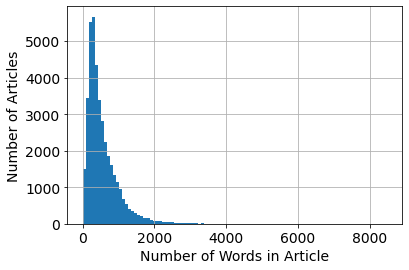

In [5]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [27, 15]
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14);

Let's take a look at what this distribution looks like under a log transform. Note we'll shift the word count by 1 so that we avoid taking the log of infinity.

In [7]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

Now, creating a histogram for both we have:

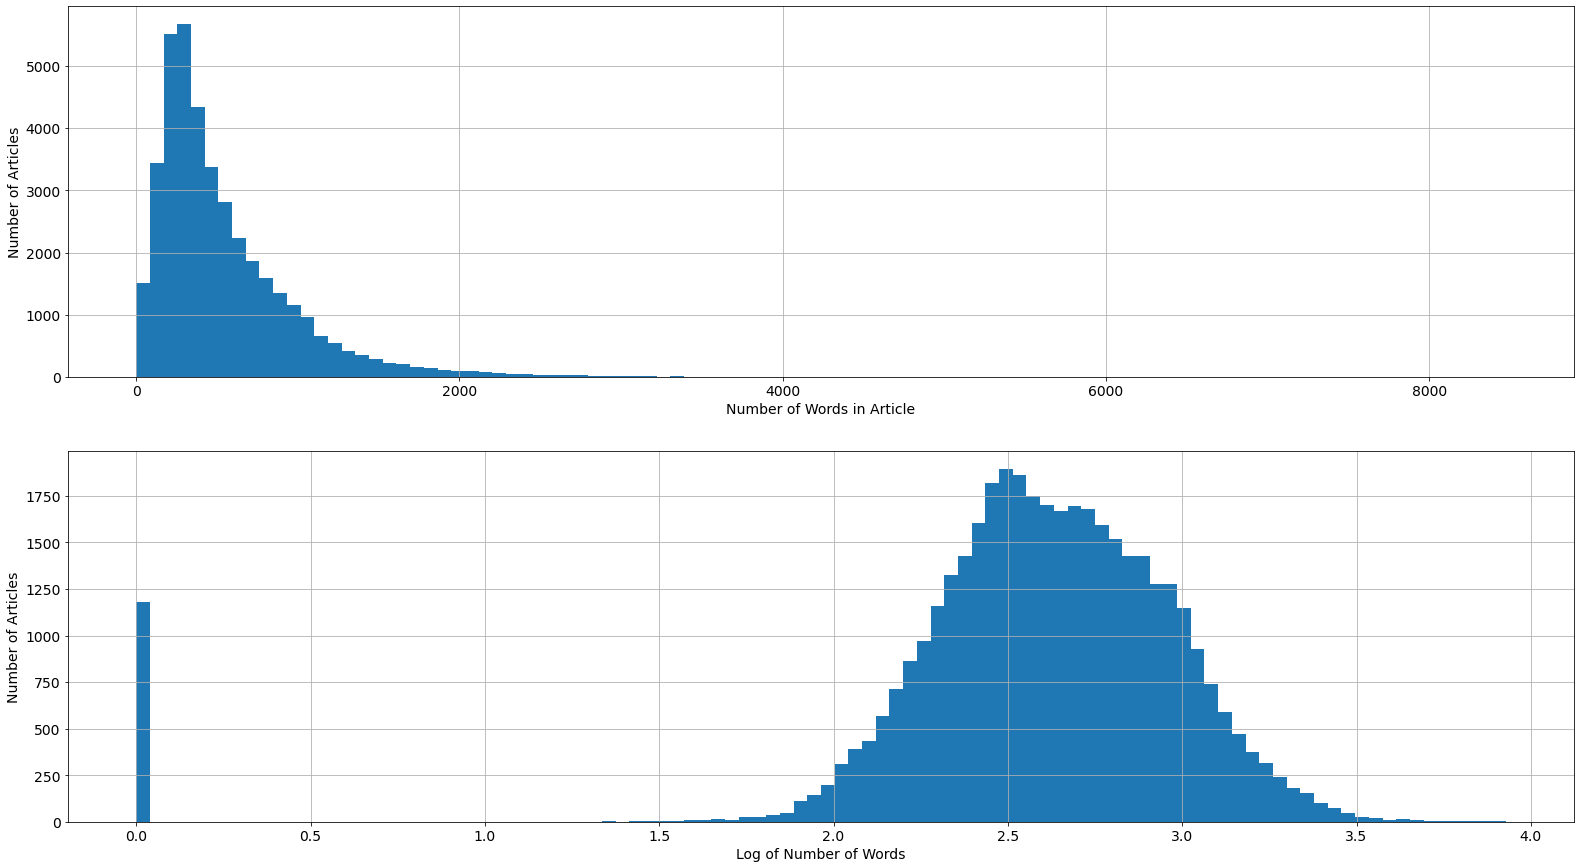

In [9]:
plt.figure()
ax = plt.subplot(2,1,1)
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14);

The log transform is a powerful tool for dealing with positive numbers with a right-skewed distribution. It compresses the long tail in the high end of the distribution into a shorter tail, and expands the low end into a longer head. As you can see above, after a logarithmic transformation, the distribution becomes much less skewed and much more "normal".

### Power Transforms

Generally speaking, a log transform works well for right-skewed data, but not left-skewed data.

<center>
    <div>
        <img src="https://lh3.googleusercontent.com/drive-viewer/AEYmBYQHfP-eZuSRAFdm2z5eTztOwtB4ZTcTi6CG3Q_nWyGEZ3XcH42wwgoVw6CUxNq8qWwE2ZMpWXP4MeYF6AqHa7znJs5B=s1600" width=1000/>
    </div>
</center>


So, what do we do with a left-skewed distribution? Well, the log transform is a specific example of a family of transformations known as *power transforms*. In statistical terms, these are *variance-stabilizing transformations*. In fact, there is a whole  family of power transformations known as the Box-Cox transforms, which are of the form:


<center>
    $\displaystyle \tilde{x} = \left\{\begin{array}{cc} \frac{x^{\lambda}-1}{\lambda} & if \lambda \neq 0,\\ \ln{(x)} & if \lambda = 0\end{array}\right.$
</center>

The Box-Cox transform for $\lambda < 1$ compresses the higher values, while $\lambda > 1$ has the opposite effect. So, to fix left-skewed data, use a $\lambda > 1$. 

### Scaling

Some features, such as latitude or longitude, are bounded in value. Other numeric features, such as counts, may increase without bound. Models that are smooth functions of the input, such as linear regression, logistic regression, or anything that involves a matrix, are affected by the scale of the input. Tree-based models, on the other hand, couldn't care less. If your model is sensitive to the scale of input features, feature scaling could help As the name suggests, feature scaling changes the scale of the feature. Sometimes people also call it *feature normalization*. Feature scaling is usually done individually to each feature. Some type of scaling include:

**Mix-Max Scaling**

Let $x$ by an individual feature value, and $min(x)$ and $max(x)$, respectively, be the minimum and maximum values of this feature over the entire dataset. Min-max scaling squeezes (or stretches) all feature values to be within the range of $[0,1]$.

<center>
    $\displaystyle \tilde{x} = \frac{x-min(x)}{max(x) - min(x)}$
</center>

**Standardization (Variance Scaling)**

Sometimes known as *feature standardization*, it is defined as:

<center>
    $\displaystyle \tilde{x} = \frac{x-mean(x)}{\sqrt{var(x)}}$
</center>

Note $\sqrt{var(x)}$ is the *standard deviation*, which is frequently written as $\sigma$. It subtracts off the mean of the feature (over all data points) and divides by the variance. Hence, it can also be called *variance scaling*. The resulting scaled feature has a mean of $0$ and a variance of $1$. If the original feature has a Gaussian (normal) distribution, then the scaled feature does too.

## Numeric Feature Generation

There are many, many ways to generate features from existing data, and we'll just touch on some basic ones here. Specifically, quantization or "binning".

Suppose you have a numeric variable and you want to place it in specific bins. Let's say you're realized there are certain income ranges in which people behave certain ways, and you want to place them in these ranges. In doing so, you're creating a new feature from your existing data.

**Fixed Width Binning**

With fixed-width binning, each bin contains a specific numeric range. The ranges can be custom designed or automatically segmented, and they can be linearly scaled or exponentially scaled. For example, we can group people into age ranges by decade: 0-9 years old in bin 1, 10-19 years in bin 2, etc. It's also common to see custom-designed age ranges that better correspond to stages of life.

When the numbers span multiple magnitudes, it may be better to group by powers of 10 (or powers of any constant): 0-9, 10-99, 100-999, 1000-9999, etc. The bin widths grow exponentially. To map from the count to the bin, we take the log of the count. Exponential-width binning is very much related to the log transform.

**Quantile binning**

Fixed-width binning is easy to computer. But if there are large gaps in the counts, then there will be many empty bins with no data. The problem can be solved by adaptively positioning the bins based on the distribution of the data. This can be done using the quantiles of the distribution.

Quantiles are values that divide the data into equal portions. For example, the median divides the data in halves; half the data points are smaller and half larger than the median. The quartiles divide the data into quarters, the deciles into tenths, etc. We can check out deciles for our word count data above using the code below.

In [11]:
deciles = df['n_tokens_content'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     152.0
0.2     217.0
0.3     276.0
0.4     335.0
0.5     409.0
0.6     507.0
0.7     633.0
0.8     810.0
0.9    1090.0
Name: n_tokens_content, dtype: float64

We can visualize these deciles on the histogram:

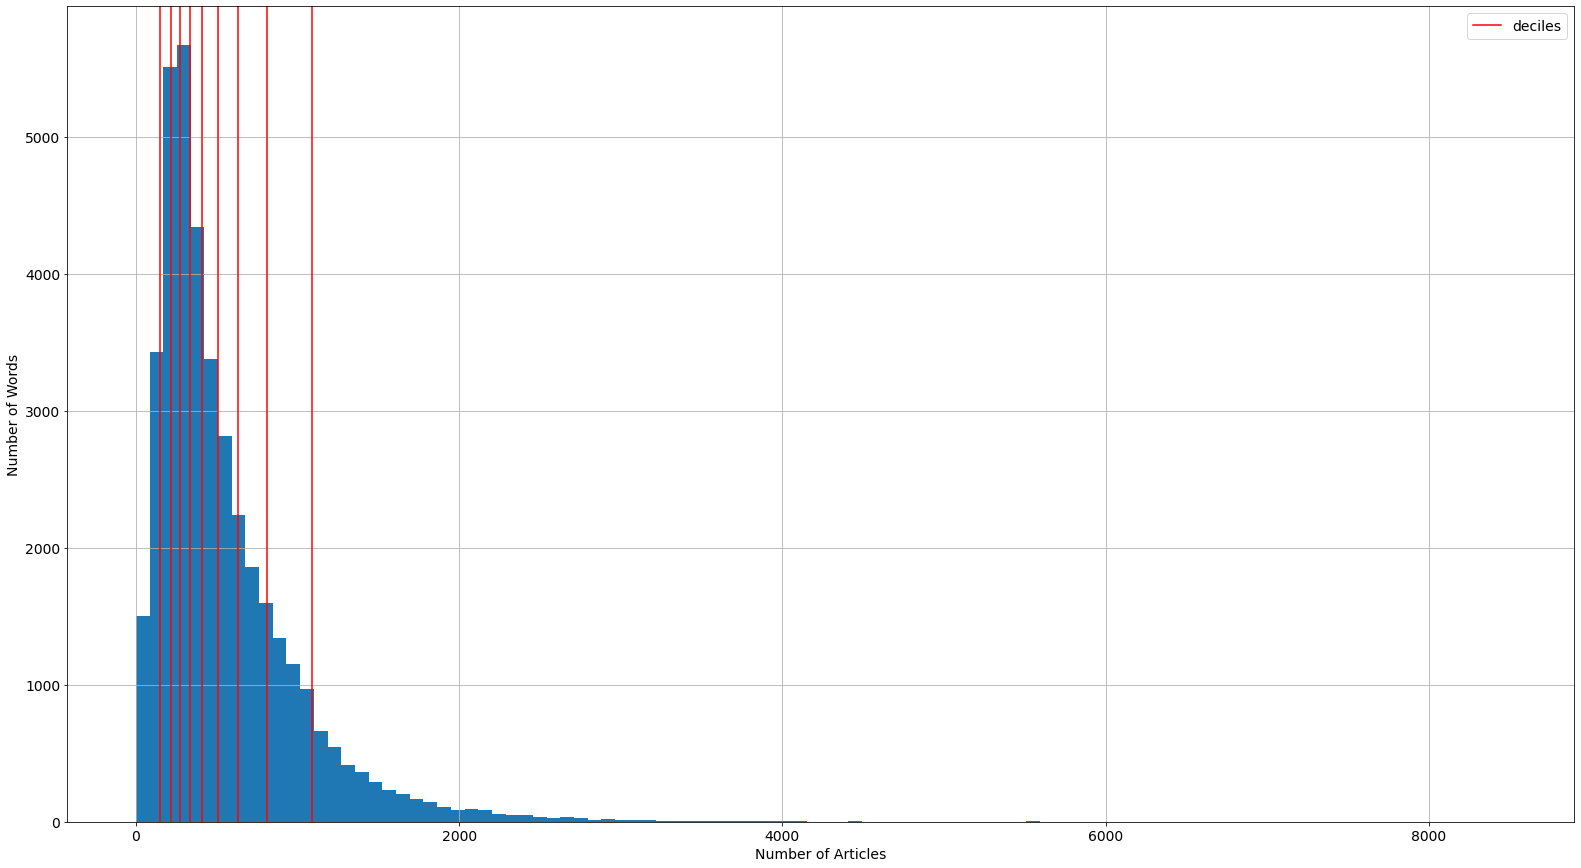

In [13]:
fig, ax = plt.subplots()
df['n_tokens_content'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Articles', fontsize=14)
ax.set_ylabel('Number of Words', fontsize=14);